<div dir=rtl>

# פרוייקט גמר במדעי המחשב - אייל ששון

<div dir=rtl>

## הקדמה

בפרוייקט זה אאסוף ואנתח מידע על תחרויות ומשחקי ספורט אלקטרוני (esports) של המשחק Counter-Strike: Global Offensive, בעזרת Python. אשתמש ב-web scraping בעזרת הכלי BeatifulSoup על מנת לבצע את הרכשת הנתונים, לאחר מכן אנתח את הנתונים באופן גרפי בעזרת הספריות matplotlib ו-seaborn, ולבסוף אבנה ואנתח מודל שינסה לחזות את ההסתברות של שחקן לנצח במשחק מסוים על פי הביצועים שלו, עם הכלי לרגרסיה לוגיסטית מהספריה sklearn.

### רקע כללי

**Counter-Strike: Global Offesive**, או בקיצור CS:GO, הוא משחק מחשב תחרותי מגוף ראשון, שפותח על ידי Valve ו-Hidden Path Entertainment ושוחרר למחשב האישי ב-21 באוגוסט 2012. במצב המשחק העיקרי והפופולרי ביותר מתחרות שתי קבוצות של 5 שחקנים כל אחת - הטרוריסטים ולוחמי הטרור (Counter Terrorists), כאשר על כל קבוצה להרוג את כל חברי הקבוצה השנייה או לבצע את משימתה. בכל סיבוב על הטרוריסטים לשתול פצצה באחד מהאתרים המיועדים בתוך 1:55 דקות, אחרת יפסידו אוטומטית. לאחר שתילת הפצצה על הטרוריסטים להגן עליה במשך 40 שניות, עד התפוצצותה, כאשר על הלוחמים בטרור לנטרלה. במידה והפצצה לא הושתלה, הסיבוב יכול להיגמר גם על ידי הריגת כל חברי הקבוצה היריבה. לאחר שתילת הפצצה, הלוחמים בטרור חייבים לנטרל אותה כדי לנצח את הסיבוב, גם אם כל הטרוריסטים מתים.

כל משחק מורכב מ-30 סיבובים, כאשר לאחר 15 סיבובים יש חילוף צדדים: הטרוריסטים הופכים להיות הלוחמים בטרור, ולהפך. הקבוצה שמגיעה ל16 נקודות ראשונה, מנצחת (שכן הקבוצה השנייה כבר לא יכולה להדביק את הפער במגבלת הזמן של 30 סיבובים). המשחק יכול גם להיגמר במצב של 15-15, אולם במשחקים מקצועיים ובתחרויות לרוב תהיה הארכה במצב שכזה.

למשחק סצנה מקצועית גדולה ומוכרת בענף הספורט האלקטרוני, בעיקר בשל העובדה שהמשחק דורש יכולת ומיומנות גבוהה, לצד עבודת צוות הכוללת החלפת אינפורמציה. אתר אינטרנט מצוין המרכז מידע ותוצאות של משחקים מקצועיים הוא [hltv.org](https://www.hltv.org/).

<div dir=rtl>

## א. הגדרת הבעיה

בעבודה זו ארצה לענות על השאלה: האם שחקן ינצח משחק מסוים? אשתמש ברגרסיה לוגיסטית כדי לאמן מסווג שיחזה את ההסתברות ששחקן ינצח. אשתמש ב-crawling כדי לאסוף את הנתונים הדרושים לי לאימון ובדיקת מודל סיווג.

<div dir=rtl>

## ב. הרכשת נתונים

<div dir=rtl>

### ייבוא ספריות

נתחיל בייבוא הספריות הדרושות:
*   `pandas`: ספרייה המאפשרת עבודה עם טבלאות ועיבוד מידע.
*   `numpy`: ספרייה המאפשרת שימוש באלגברה לינארית.
*   `matplotlib`: ספרייה המאפשרת הצגת נתונים בצורה גרפית. מתוכה נשתמש במודל pyplot.
*   `seaborn`: הרחבה של matplotlib המאפשרת יצירת גרפים מתקדמים ומשמעותיים יותר.
*   `requests`: ספרייה המאפשרת לנו גישה ואיסוף של כל אתר אינטרנט.
*   `BeatifulSoup`: כלי המאפשר ניתוח מתקדם של אתרי אינטרנט ואיסוף מידע מתוכם.
*   `time.sleep`: פונקציה פשוטה מתוך ספרייה מובנית של פייתון המאפשרת המתנה בין שורות קוד. נשתמש בה כדי להמתין בין בקשה לבקשה בשביל להימנע מחסימתנו מאתר האינטרנט.
*   `random.randint`: עוד פונקציה פשוטה המגרילה מספר רנדומלי בין שני ערכים המועברים כפרמטר. נשתמש בה כדי להגריל מספר רנדומלי של שניות להמתנה, כדי להקטין את הסיכוי שאתר האינטרנט "יעלה" על הקוד שלנו ויחסום אותנו.

`matplotlib inline%`: פקודה הגורמת לג'ופיטר להציג את הגרפים ישירות מתחת לבלוק הקוד.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
from time import sleep
from random import randint

%matplotlib inline

<div dir=rtl>

### איסוף כתובות האינטרנט

<div dir=rtl>

כעת נרצה לעבור על העמוד הראשי של המשחקים באתר hltv ולאסוף כתובות אינטרנט של משחקים שנחקור לעומק בהמשך. כאן אני עובר על 10 עמודים בטווח בין 0 ל500 בקפיצות של 50, מכיוון שבכל עמוד באתר ישנם 50 משחקים.

בתור פרמטרים לבקשה אני מעביר את טווח התאריכים שהוא במקרה הזה כל שנת 2019 (בחרתי בשנה זו מכיוון שהיא השנה הכי אחרונה שבה התקיימו משחקים בכמות ממוצעת בשונה משנת 2020 בה לא היו כמעט כלל משחקים תחרותיים). אדרוש לקבל רק משחקים מאירועים גדולים כדי לקבל תוצאות יותר יציבות (באירועים כאלה נדיר שמשחקים נגמרים באמצע או שרמות השחקנים שונות באופן משמעותי), ואעביר את משתנה offset שגדל ב50 בכל איטרציה של הלולאה, מה שמאפשר מעבר בין עמודים באתר.

לאחר מכן אקח את אתר האינטרנט ואצור מהתוכן שלו (שהוא מחרוזת ארוכה של קוד html) מחלקה של BeautifulSoup. כל דף אכניס לרשימה ואמתין 2-4 שניות לפני הבקשה הבאה.

In [ ]:
pages = []
for offset in range(0, 500, 50):
    url = 'https://www.hltv.org/stats/matches'
    params = {'startDate': '2019-01-01', 'endDate': '2019-12-31', 'matchType': 'BigEvents', 'offset': offset}
    r = requests.get(url, params=params)
    soup = BeautifulSoup(r.content, 'html.parser')
    pages.append(soup)
    sleep(randint(2,4))

<div dir=rtl>

נחלץ את כל הכתובות של המשחקים מתוך אותם עמודים. בכל עמוד אחפש את כל הטגים מסוג div בעלי מחלקה בשם time, משום שאותם תגים כוללים את התאריך של המשחק, שמתפקד גם כקישור לעמוד המשחק עצמו. לאחר מכן אחלץ את הקישור מכל אובייקט ברשימה שמצאתי, ואוסיף לו בהתחלה את הקידומת של האתר. אאחד בין הרשימה שהגדרתי בהתחלה לבין הרשימה של כתובות המשחקים של כל דף בנפרד.

In [ ]:
match_urls = []
for page in pages:
    urls = page('div', attrs={'class':'time'})
    urls = ['https://www.hltv.org'+x.parent['href'] for x in urls]
    match_urls.extend(urls)
print(len(match_urls)) # print how many matches we have
match_urls[:10] # print the first few match link

500


['https://www.hltv.org/stats/matches/mapstatsid/97224/vitality-vs-mousesports?startDate=2019-01-01&endDate=2019-12-31&matchType=BigEvents',
 'https://www.hltv.org/stats/matches/mapstatsid/97221/vitality-vs-mousesports?startDate=2019-01-01&endDate=2019-12-31&matchType=BigEvents',
 'https://www.hltv.org/stats/matches/mapstatsid/97216/mousesports-vs-vitality?startDate=2019-01-01&endDate=2019-12-31&matchType=BigEvents',
 'https://www.hltv.org/stats/matches/mapstatsid/97210/mousesports-vs-evil-geniuses?startDate=2019-01-01&endDate=2019-12-31&matchType=BigEvents',
 'https://www.hltv.org/stats/matches/mapstatsid/97206/mousesports-vs-evil-geniuses?startDate=2019-01-01&endDate=2019-12-31&matchType=BigEvents',
 'https://www.hltv.org/stats/matches/mapstatsid/97201/heroic-vs-vitality?startDate=2019-01-01&endDate=2019-12-31&matchType=BigEvents',
 'https://www.hltv.org/stats/matches/mapstatsid/97200/vitality-vs-heroic?startDate=2019-01-01&endDate=2019-12-31&matchType=BigEvents',
 'https://www.hltv.o

<div dir=rtl>

#### הערות

נשים לב שיש לנו 500 קישורים למשחקים (עברנו על 10 עמודים שבהם 500 משחקים בכל עמוד).

בנוסף אפשר לראות סיומת קבועה בכל קישור: `startDate=2019-01-01&endDate=2019-12-31&matchType=BigEvents?`. הסיומת הזו נשארה מהעמוד הקודם בו "גלשנו" והיא לא רלוונטית ולא משנה את תוכן העמוד עצמו.

<div dir=rtl>

###  חילוץ מידע מכל עמוד

כעת אנו מגיעים לחלק הארוך והמורכב ביותר בפרק. נעבור על כל הדפים של כל משחק ומשחק ונחלץ מתוכם נתונים וסטטיסטיקה על אותו משחק.

נתחיל ביצירת מערך נתונים שבו העמודות שאותן נרצה לאסוף בעבור כל שחקן במשחק:
* Nickname: שם השחקן
* Team: שם הקבוצה
* Country: מדינת המקור
* Kills: מספר ההריגות במשחק
* HeadshotKills: מספר ההריגות שהתבצעו ביריות לראש
* Assists: מספר הסיועים בהריגות
* Deaths: מספר המיתות
* KAST &#8207; (killed, assisted, survived or traded): אחוז הסיבובים בהם השחקן הרג, עזר בהריגה, נשאר בחיים, **או** ביצע החלפת הריגה (death trade, השחקן נהרג ושחקן אחר מקבוצתו מיד הרג את ההורג שלו, כלומר השחקן היווה פיתיון).
* ADR &#8207; (average damage / round): הנזק הממוצע שהשחקן עושה בכל סיבוב (לכל שחקן 100 נקודות חיים, וכל נקודה ששחקן מוריד לשחקן אחר נחשבת נזק).
* Winner: האם השחקן (וקבוצתו) ניצח את אותו המשחק.

אנו עומדים לבצע 500 בקשות ברצף, לכן הסיכוי להיחסם על ידי האתר גבוה, אך נבצע פעולות שיסתירו אותנו ויקטינו משמעותית את הסיכוי שהאתר יבין שמדובר בקוד אוטומטי ויחסום אותנו (למעשה, בכל הפעמים שהרצתי את הקוד הנוכחי לא נחסמתי).

בתחילה נשתמש במשתנה headers בבקשה שלנו, שבו נדווח שאנו גולשים מתוך דפדפן Firefox במערכת הפעלה Windows NT 6.1 (בפועל אנחנו מן הסתם לא גולשים כך). ניצור אובייקט Session המאפשר לנו להגדיר מתאמי http בבקשה שלנו, שימנעו מהאתר לעצור אותנו משום שאנו לא עומדים בסטנדרט האבטחה בלי אותם מתאמים.

עבור כל קישור, נקבל את אתר האינטרנט המתאים ונעבירו לפורמט BeautifulSoup. כאן גם נחכה 2-4 שניות כדי להימנע מחסימה. אם קיבלנו קוד תשובה שאינו 200 (כלומר הבקשה נכשלה), נדפיס את קוד השגיאה ונצא מהלולאה. נשמור את שם הקבוצה המנצחת על פי טג ה-css שנקרא `bold won`, אשר כולל את שם הקבוצה המנצחת בכל משחק מלבד המשחקים בהם יש שוויון, אשר מהם פשוט נתעלם (העמודה שלנו צריכה להיות בוליאנית ולכן לא נוכל לכלול בה מצב של שוויון). נדפיס גם הודעה שמצאנו שוויון.

בהמשך ניקח את שתי הטבלאות שמתאימות לשתי הקבוצות ששיחקו, ובכל אחת נמצא, על פי טגי css, את הנתונים הבאים **לכל שחקן** (נתונים מספריים נמיר ממחרוזת לערך ממשי):
* במשתנה is_winner נשמור ערך בוליאני שמשמעותו האם השחקן בקבוצה המנצחת או לא.
* נשמור את שם הקבוצה.
* נשמור את שם המדינה.
* נשמור רשימה `kills_headshots` שבה שני ערכים, ההריגות וההריגות ביריה לראש. זאת על פי הערך בטבלה שנמצא בעמודה אחת הכוללת גם את מספר ההריגות וגם את ההריגות ביריה לראש (בצורה של `kills (headshotKills)`). נפצל את הרשימה לשני הערכים שהיא מייצגת.
* נשמור את מספר הסיועים בהריגות.
* נשמור את מספר המיתות.
* נשמור את ה-KAST.
* נשמור את ה-ADR.

לבסוף נוסיף שורה לטבלה עם כל הערכים המתאימים.

In [ ]:
df = pd.DataFrame(columns=['Nickname', 'Team', 'Country', 'Kills', 'HeadshotKills', 'Assists', 'Deaths', 'KAST', 'ADR', 'Winner'])


headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'}

sess = requests.Session()
adapter = requests.adapters.HTTPAdapter(max_retries = 20)
sess.mount('http://', adapter)

for url in match_urls:
    r = sess.get(url, headers=headers)
    sleep(randint(2,4))
    if (r.status_code != 200): # if we get an error in the response, this will print the error code and stop the code
        print(r)
        break
    soup = BeautifulSoup(r.content, 'html.parser')
    winner = soup.select_one('.bold.won')
    if not winner: # this means there was a draw, so we will ignore the match
        print('draw, skipping...')
        continue
    winner = winner.parent.a.text
    stats = soup('table', attrs={'class':'stats-table'})
    for table in stats:
        team = table.select_one('.st-teamname').text
        rows = table.tbody('tr')
        is_winner = team==winner
        for player in rows:
            name = player.select_one('.st-player').text.strip()
            country = player.select_one('.flag')['title']
            kills_headshots = player.select_one('.st-kills').text.split(' ')
            kills = float(kills_headshots[0])
            headshots = float(kills_headshots[1].strip('()'))
            assists = float(player.select_one('.st-assists').text.split(' ')[0])
            deaths = float(player.select_one('.st-deaths').text)
            kast = float(player.select_one('.st-kdratio').text.strip('%'))
            adr = float(player.select_one('.st-adr').text)
            df.loc[len(df)] = [name, team, country, kills, headshots, assists, deaths, kast, adr, is_winner]

draw, skipping...
draw, skipping...
draw, skipping...
draw, skipping...


<div dir=rtl>

דוגמה לדף של משחק בודד באתר HLTV:

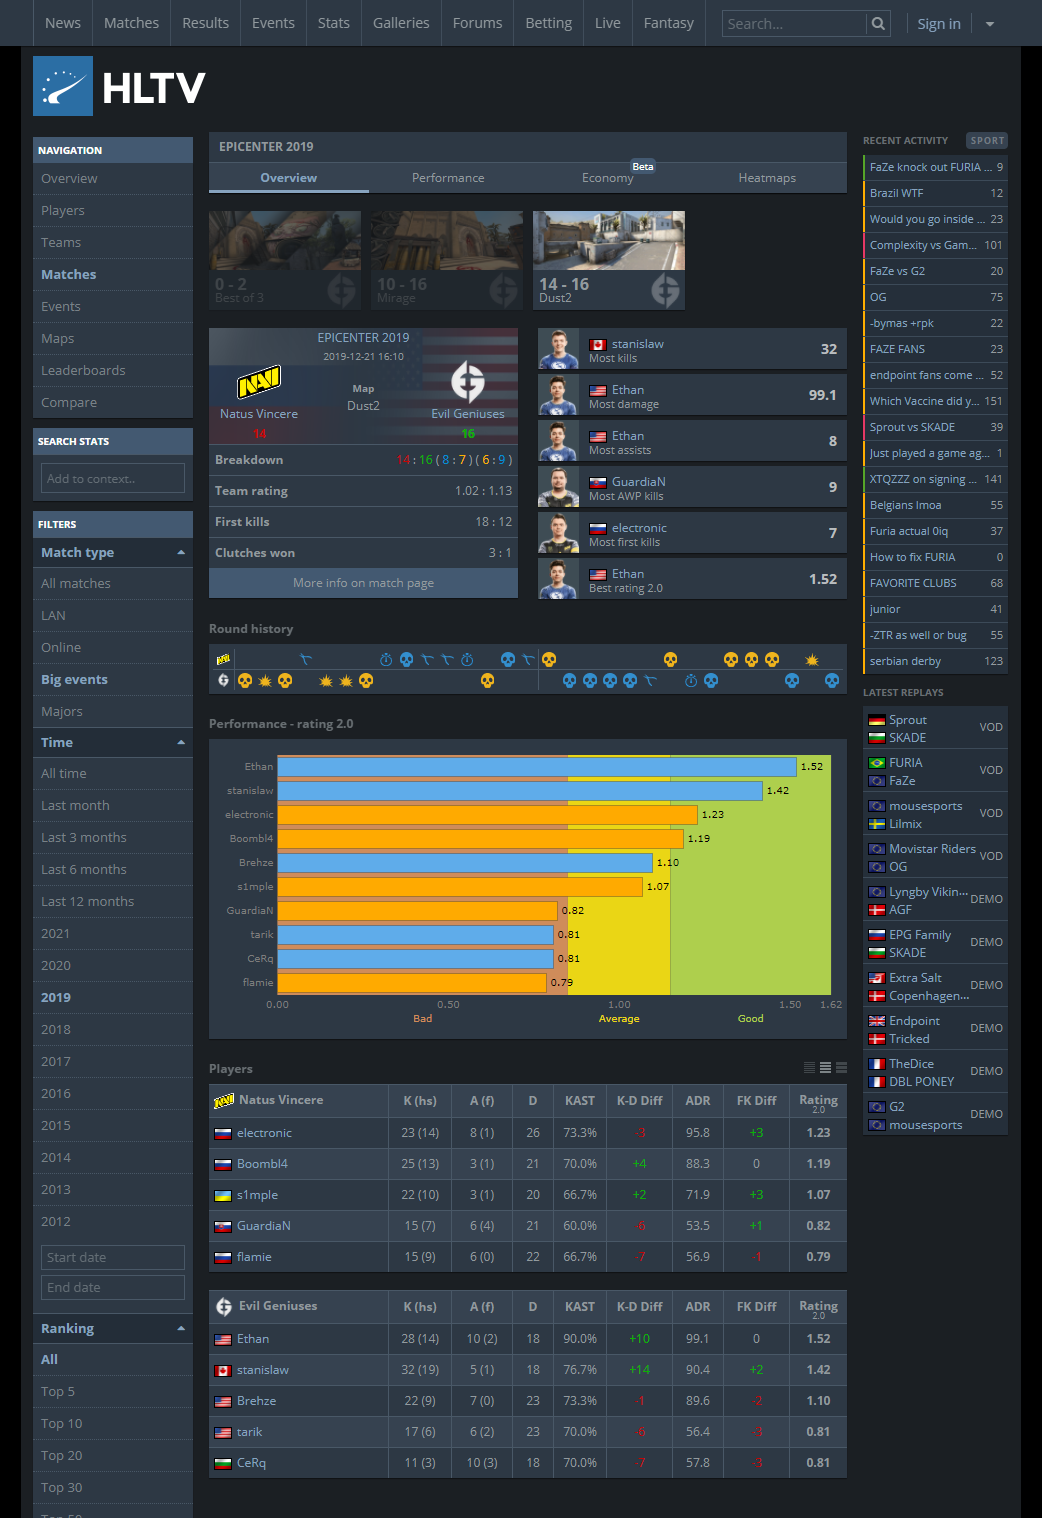

<div dir=rtl>

### בחינת מערך הנתונים

נציג את מערך הנתונים שקיבלנו. נוכל לראות שיש לנו 10 עמודות ו-4960 שורות, מכיוון ש: (500 משחקים - 4 משחקים עם שוויון) * 10 שחקנים במשחק = 4960 שחקנים בסך הכל. כמובן שישנם שחקנים ששמם מופיע יותר מפעם אחת, אבל הביצועים של שני המופעים יהיו שונים, כי מדובר במשחקים אחרים של אותו השחקן.

In [ ]:
df

,Nickname,Team,Country,Kills,HeadshotKills,Assists,Deaths,KAST,ADR,Winner
0,ALEX,Vitality,United Kingdom,23.0,8.0,6.0,17.0,76.0,112.4,True
1,RpK,Vitality,France,25.0,14.0,2.0,16.0,76.0,87.1,True
2,ZywOo,Vitality,France,19.0,7.0,4.0,14.0,72.0,79.5,True
3,apEX,Vitality,France,18.0,10.0,5.0,15.0,72.0,83.7,True
4,shox,Vitality,France,11.0,7.0,3.0,15.0,60.0,41.8,True
...,...,...,...,...,...,...,...,...,...,...
4955,CeRq,NRG,Bulgaria,28.0,8.0,3.0,16.0,78.6,98.1,False
4956,stanislaw,NRG,Canada,15.0,6.0,8.0,18.0,71.4,68.6,False
4957,Brehze,NRG,United States,19.0,8.0,2.0,20.0,75.0,67.0,False
4958,tarik,NRG,United States,15.0,6.0,5.0,19.0,57.1,67.0,False


<div dir=rtl>

## ג. ניתוח נתונים מתקדם

<div dir=rtl>

### הצגת מערך הנתונים

In [ ]:
df.head(10)

,Nickname,Team,Country,Kills,HeadshotKills,Assists,Deaths,KAST,ADR,Winner
0,ALEX,Vitality,United Kingdom,23.0,8.0,6.0,17.0,76.0,112.4,True
1,RpK,Vitality,France,25.0,14.0,2.0,16.0,76.0,87.1,True
2,ZywOo,Vitality,France,19.0,7.0,4.0,14.0,72.0,79.5,True
3,apEX,Vitality,France,18.0,10.0,5.0,15.0,72.0,83.7,True
4,shox,Vitality,France,11.0,7.0,3.0,15.0,60.0,41.8,True
5,ropz,mousesports,Estonia,22.0,10.0,2.0,20.0,72.0,93.8,False
6,frozen,mousesports,Slovakia,17.0,11.0,0.0,20.0,52.0,64.8,False
7,chrisJ,mousesports,Netherlands,14.0,7.0,4.0,17.0,52.0,62.3,False
8,woxic,mousesports,Turkey,12.0,4.0,5.0,17.0,60.0,50.6,False
9,karrigan,mousesports,Denmark,12.0,6.0,4.0,22.0,52.0,70.6,False


<div dir=rtl>

### מידע בסיסי על מערך הנתונים

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4960 entries, 0 to 4959
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Nickname       4960 non-null   object 
 1   Team           4960 non-null   object 
 2   Country        4960 non-null   object 
 3   Kills          4960 non-null   float64
 4   HeadshotKills  4960 non-null   float64
 5   Assists        4960 non-null   float64
 6   Deaths         4960 non-null   float64
 7   KAST           4960 non-null   float64
 8   ADR            4960 non-null   float64
 9   Winner         4960 non-null   object 
dtypes: float64(6), object(4)
memory usage: 426.2+ KB


<div dir=rtl>

אנו יכולים לראות כי יש 4960 שורות ו-10 עמודות. חלק מהמשתנים קטגוריאליים (`object`) וחלקם מספריים (`float64`). 

<div dir=rtl>

### נתונים סטטיסטיים על מערך הנתונים

נשתמש בפקודה `()df.describe` יחד עם הפרמטר `'include='all` כדי להציג נתונים על כל המשתנים במערך שלנו.

In [ ]:
df.describe(include='all')

,Nickname,Team,Country,Kills,HeadshotKills,Assists,Deaths,KAST,ADR,Winner
count,4960,4960,4960,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4960
unique,176,36,34,NaN,NaN,NaN,NaN,NaN,NaN,2
top,stanislaw,Liquid,Denmark,NaN,NaN,NaN,NaN,NaN,NaN,True
freq,86,410,739,NaN,NaN,NaN,NaN,NaN,NaN,2480
mean,NaN,NaN,NaN,17.409274,7.914919,4.554234,17.442742,69.225645,73.105706,NaN
std,NaN,NaN,NaN,6.264184,3.830343,2.621418,4.829827,11.869506,18.071107,NaN
min,NaN,NaN,NaN,2.000000,0.000000,0.000000,3.000000,25.000000,17.500000,NaN
25%,NaN,NaN,NaN,13.000000,5.000000,3.000000,15.000000,61.900000,60.600000,NaN
50%,NaN,NaN,NaN,17.000000,7.000000,4.000000,18.000000,69.650000,72.200000,NaN
75%,NaN,NaN,NaN,21.000000,10.000000,6.000000,20.000000,76.900000,84.425000,NaN


<div dir=rtl>

נוכל לראות כי בכמה מהמשתנים הערך המקסימלי נמצא כמה וכמה סטיות תקן מעל החציון ואף הערך ה-75%, ובהם נטפל מאוחר יותר. השערה סבירה למקור של החריגים היא אורך בלתי רגיל של משחקים, כתוצאה מהארכה, מה שגורם לנתונים גבוהים במיוחד.

<div dir=rtl>

### ערכים חסרים וכפולים במערך הנתונים

נשתמש בפקודה `()isnull` כדי לספור את הערכים החסרים, ובפקודה `()duplicated` כדי לספור את השורות הכפולות.

In [ ]:
df.isnull().sum()

Nickname         0
Team             0
Country          0
Kills            0
HeadshotKills    0
Assists          0
Deaths           0
KAST             0
ADR              0
Winner           0
dtype: int64

In [ ]:
df.duplicated().sum()

0

<div dir=rtl>

נראה שאין לנו ערכים כפולים או חסרים בנתונים.

<div dir=rtl>

### חקירת משתנה היעד

<div dir=rtl>

#### הצגת התפלגות הערכים במשתנה

In [ ]:
df.Winner.value_counts()

True     2480
False    2480
Name: Winner, dtype: int64

<div dir=rtl>

#### דיאגרמה של התפלגות הערכים

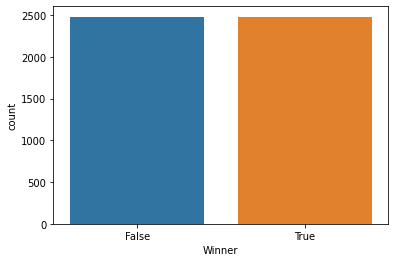

In [ ]:
sns.countplot(x="Winner", data=df)
plt.show()

<div dir=rtl>

אנו רואים כי ההתפלגות שווה בין ניצחונות והפסדים, הדבר נגרם מהסיבה הפשוטה שבכל משחק חמישה שחקנים מנצחים וחמישה שחקנים מפסידים, לכן מספר השחקנים המפסידים והמנצחים נשאר שווה.

<div dir=rtl>

### חקירת משתנים קטגוריאליים

<div dir=rtl>

#### מציאת משתנים קטגוריאליים

נחפש עמודות שסוג הנתון שלהם 0, כלומר מחרוזת. נציג רק את העמודות הללו מתוך מערך הנתונים.

In [ ]:
categorical = [var for var in df.columns if df[var].dtype=='O']

df[categorical].head()

,Nickname,Team,Country,Winner
0,ALEX,Vitality,United Kingdom,True
1,RpK,Vitality,France,True
2,ZywOo,Vitality,France,True
3,apEX,Vitality,France,True
4,shox,Vitality,France,True


<div dir=rtl>

#### תדירות המשתנים הקטגוריאליים

נציג את התדירות ואת ההתפלגות היחסית של כל ערך.

In [ ]:
for var in categorical: 
    
    print(df[var].value_counts())

stanislaw    86
Ethan        86
CeRq         86
tarik        86
Twistzz      82
             ..
Cooper        4
xiaosaGe      4
Subroza       4
B1NGO         4
Eley          3
Name: Nickname, Length: 176, dtype: int64
Liquid           410
Astralis         380
Vitality         365
Evil Geniuses    340
fnatic           310
mousesports      265
G2               255
Natus Vincere    245
FaZe             240
NIP              235
MIBR             230
Renegades        220
ENCE             180
Heroic           155
FURIA            130
AVANGAR          115
North            105
100 Thieves      100
NRG               90
TYLOO             60
OpTic             55
forZe             50
CR4ZY             45
Envy              45
Cloud9            45
Grayhound         40
ATK               40
Sharks            35
Virtus.pro        30
ViCi              25
eUnited           20
Invictus          20
Imperial          20
DreamEaters       20
5POWER            20
EHOME             20
Name: Team, dtype: int64
D

In [ ]:
for var in categorical: 
    
    print(df[var].value_counts(normalize=True))

stanislaw    0.017339
Ethan        0.017339
CeRq         0.017339
tarik        0.017339
Twistzz      0.016532
               ...   
Cooper       0.000806
xiaosaGe     0.000806
Subroza      0.000806
B1NGO        0.000806
Eley         0.000605
Name: Nickname, Length: 176, dtype: float64
Liquid           0.082661
Astralis         0.076613
Vitality         0.073589
Evil Geniuses    0.068548
fnatic           0.062500
mousesports      0.053427
G2               0.051411
Natus Vincere    0.049395
FaZe             0.048387
NIP              0.047379
MIBR             0.046371
Renegades        0.044355
ENCE             0.036290
Heroic           0.031250
FURIA            0.026210
AVANGAR          0.023185
North            0.021169
100 Thieves      0.020161
NRG              0.018145
TYLOO            0.012097
OpTic            0.011089
forZe            0.010081
CR4ZY            0.009073
Envy             0.009073
Cloud9           0.009073
Grayhound        0.008065
ATK              0.008065
Sharks      

<div dir=rtl>

#### מספר התוויות: קרדינליות

מספר התוויות במשתנה קטגוריאלי מכונה **קרדינליות** (cardinality). מספר גבוה של תוויות מכונה קרדינליות גבוהה. קרדינליות גבוהה עלולה להוות בעיה חמורה במודל למידת המכונה. נבדוק לקרדינליות גבוהה.

In [ ]:
for var in categorical:
    
    print(var, 'contains', len(df[var].unique()), 'labels')

Nickname contains 176 labels
Team contains 36 labels
Country contains 34 labels
Winner contains 2 labels


<div dir=rtl>

נראה כי למשתנה `Nickname` קרדינליות גבוהה במיוחד.

במודל הסופי שלנו, לא נשתמש במשתני השם והקבוצה של השחקן, משום שהם יגבילו אותנו משמעותית בחיזויים עתידיים שנבצע, כי הם יהיו חייבים לכלול את אחת התוויות של השם והקבוצה, מה שלא בהכרח יקרה אם נבצע חיזויים על קבוצה שלא התאמנו עליה. לכן אין צורך לחקור אותם כעת.

<div dir=rtl>

#### חקירת המשתנה Country


In [ ]:
len(df.Country.unique()) # מספר התוויות

34

In [ ]:
df.Country.unique() # התוויות עצמן

array(['United Kingdom', 'France', 'Estonia', 'Slovakia', 'Netherlands',
       'Turkey', 'Denmark', 'United States', 'Canada', 'Bulgaria',
       'Russia', 'Ukraine', 'Kazakhstan', 'Uzbekistan', 'China', 'Taiwan',
       'Sweden', 'Latvia', 'Bosnia and Herzegovina', 'Norway', 'Brazil',
       'South Africa', 'Australia', 'New Zealand', 'Serbia', 'Argentina',
       'Hong Kong', 'Indonesia', 'Finland', 'Malaysia', 'Spain', 'Mexico',
       'Lithuania', 'Poland'], dtype=object)

In [ ]:
df.Country.value_counts() # תדירות התוויות

Denmark                   739
Sweden                    602
United States             589
France                    499
Brazil                    434
Canada                    277
Russia                    254
Australia                 231
Finland                   189
Norway                    105
China                     104
Slovakia                  103
Kazakhstan                 87
Bulgaria                   86
Bosnia and Herzegovina     81
United Kingdom             73
New Zealand                72
Ukraine                    67
Estonia                    53
Turkey                     53
Netherlands                53
Serbia                     42
Latvia                     33
Uzbekistan                 29
South Africa               21
Poland                     15
Argentina                  14
Indonesia                  12
Hong Kong                  12
Spain                       9
Lithuania                   9
Malaysia                    5
Mexico                      4
Taiwan    

In [ ]:
# קידוד חם של המשתנה, הצגת משתני דמה שבכל אחד 0 או 1 בהתאם לערך המתאים לעמודה

pd.get_dummies(df.Country).head()

,Argentina,Australia,Bosnia and Herzegovina,Brazil,Bulgaria,Canada,China,Denmark,Estonia,Finland,...,Slovakia,South Africa,Spain,Sweden,Taiwan,Turkey,Ukraine,United Kingdom,United States,Uzbekistan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<div dir=rtl>

### חקירת משתנים מספריים

נחפש משתנים שסוג העמודה שלהם לא 0, כלומר משתנים מספריים. ניפטר מהעמודה Winner כי היא משתנה היעד שלנו. נציג רק את העמודות הללו מתוך מערך הנתונים.

In [ ]:
numerical = [var for var in df.drop('Winner', axis=1).columns if df[var].dtype!='O']

df[numerical].head()

,Kills,HeadshotKills,Assists,Deaths,KAST,ADR
0,23.0,8.0,6.0,17.0,76.0,112.4
1,25.0,14.0,2.0,16.0,76.0,87.1
2,19.0,7.0,4.0,14.0,72.0,79.5
3,18.0,10.0,5.0,15.0,72.0,83.7
4,11.0,7.0,3.0,15.0,60.0,41.8


<div dir=rtl>

כל המשתנים שלנו רציפים, אבל חלקם מקבלים רק מספרים שלמים (במשחק אותם ערכים תמיד שלמים באופן אינטואיטיבי, למשל מספר הריגות).

<div dir=rtl>

#### ערכים חריגים במשתנים

נשרטט boxplots על מנת לראות כמה ערכים יוצאים מהטווח הבין רבעוני (IQR).

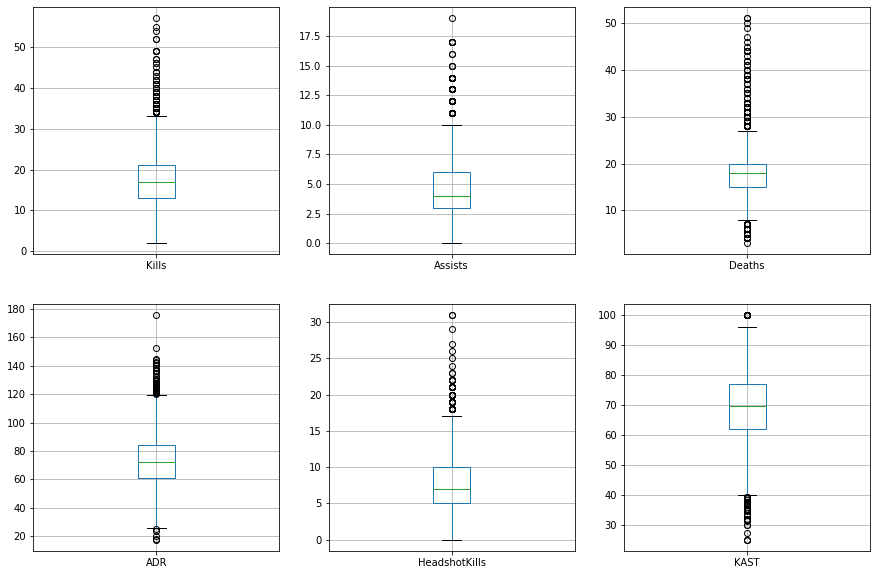

In [ ]:
plt.figure(figsize=(15,10))


plt.subplot(2, 3, 1)
fig = df.boxplot(column='Kills')


plt.subplot(2, 3, 2)
fig = df.boxplot(column='Assists')


plt.subplot(2, 3, 3)
fig = df.boxplot(column='Deaths')


plt.subplot(2, 3, 4)
fig = df.boxplot(column='ADR')


plt.subplot(2, 3, 5)
fig = df.boxplot(column='HeadshotKills')


plt.subplot(2, 3, 6)
fig = df.boxplot(column='KAST')


plt.show()

<div dir=rtl>

אנו רואים כי יש הרבה חריגים בכל המשתנים.

<div dir=rtl>

#### התפלגות המשתנים

נשרטט היסטוגרמות כדי לבדוק את התפלגות כל המשתנים המספריים.

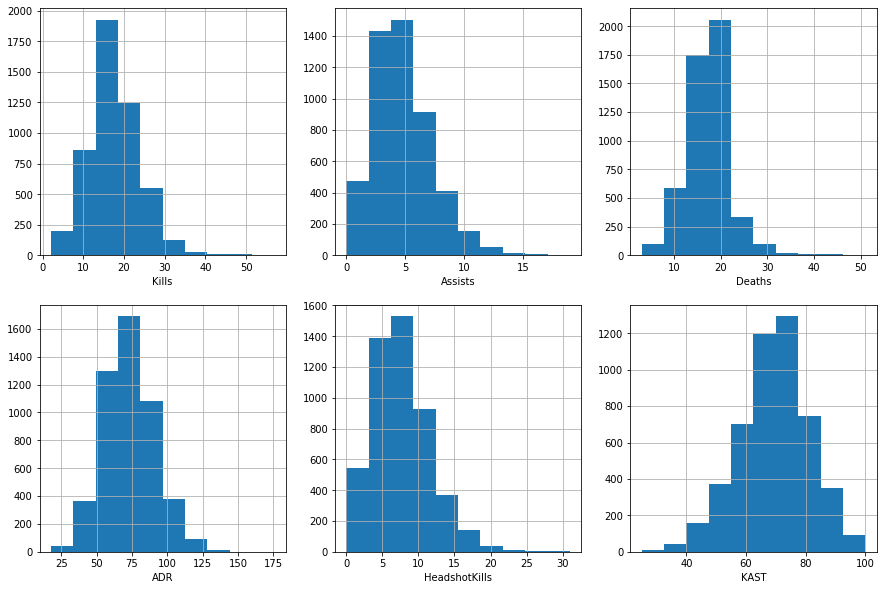

In [ ]:
plt.figure(figsize=(15,10))


plt.subplot(2, 3, 1)
fig = df.Kills.hist(bins=10)
fig.set_xlabel('Kills')


plt.subplot(2, 3, 2)
fig = df.Assists.hist(bins=10)
fig.set_xlabel('Assists')


plt.subplot(2, 3, 3)
fig = df.Deaths.hist(bins=10)
fig.set_xlabel('Deaths')


plt.subplot(2, 3, 4)
fig = df.ADR.hist(bins=10)
fig.set_xlabel('ADR')


plt.subplot(2, 3, 5)
fig = df.HeadshotKills.hist(bins=10)
fig.set_xlabel('HeadshotKills')


plt.subplot(2, 3, 6)
fig = df.KAST.hist(bins=10)
fig.set_xlabel('KAST')


plt.show()

<div dir=rtl>

בחלק מהמשתנים (`AverageAssists`, `AverageHeadshots`) ההיסטוגרמות מוטות במעט, אל זהו לא דבר משמעותי. אפשר להשתמש בפקודה `()df.skew` כדי לראות את רמת ההטייה של ההתפלגויות - ערך בין (1-) ל-1 משמעותו התפלגות קרובה לנורמלית.

In [ ]:
df[numerical].skew()

Kills            0.778227
HeadshotKills    0.766869
Assists          0.856912
Deaths           0.827299
KAST            -0.297073
ADR              0.368134
dtype: float64

<div dir=rtl>

אנו רואים שבכל המשתנים המספריים ההתפלגות נורמלית.

כעת נמצא את הטווח הבין רבעוני עבור כל משתנה, ואת הגבול העליון והגבול התחתון, שהם 1.5 פעמים ה-IQR מעל ה-75% ומתחת ל-25%, בהתאמה.

In [ ]:
Q1 = df[numerical].quantile(0.25)
Q3 = df[numerical].quantile(0.75)
IQR = Q3 - Q1
lower_fence = Q1 - IQR*1.5
upper_fence = Q3 + IQR*1.5
print(lower_fence)
print(upper_fence)

Kills             1.0000
HeadshotKills    -2.5000
Assists          -1.5000
Deaths            7.5000
KAST             39.4000
ADR              24.8625
dtype: float64
Kills             33.0000
HeadshotKills     17.5000
Assists           10.5000
Deaths            27.5000
KAST              99.4000
ADR              120.1625
dtype: float64


<div dir=rtl>

### קשרים בין המשתנים השונים

<div dir=rtl>

#### מפת חום / Heat Map

נציג מפת חום לכל המשתנים המספריים ומשתנה היעד.

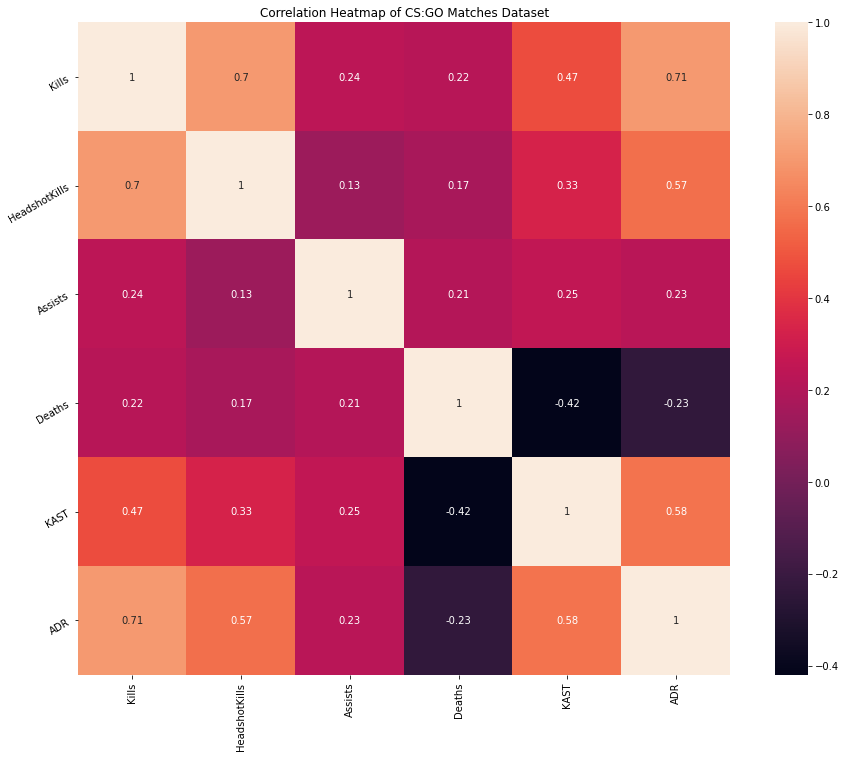

In [ ]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of CS:GO Matches Dataset')
ax = sns.heatmap(df.corr(), square=True, annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

<div dir=rtl>

אין בין המשתנים שלנו קשרים חזקים מאוד, אך יש קשרים בינוניים עד חזקים בין המשתנים:

*   `Kills` ו-`HeadshotKills` (עוצמת קשר 0.7)
*   `Kills` ו-`ADR`(עוצמת קשר 0.71)
*   `HeadshotKills` ו-`ADR` (עוצמת קשר 0.57)
*   `Deaths` ו-`KAST` (קשר הפוך בעוצמה 0.42)
*   `Deaths` ו-`Winner` (קשר הפוך בעוצמה 0.4)
*   `KAST` ו-`Kills` (עוצמת קשר 0.47)
*   `KAST` ו-`ADR` (עוצמת קשר 0.58)
*   `KAST` ו-`Winner` (עוצמת קשר 0.57)

<div dir=rtl>

#### גרף זוגות / Pair Plot

נבחר את המשתנים שביניהם מצאנו קשר בינוני עד חזק.

In [ ]:
strong_corr = ['KAST', 'Deaths', 'ADR', 'HeadshotKills', 'Kills']

<div dir=rtl>

נשרטט גרף זוגות שיציג את הקשר בין כל שני משתנים. בין כל משתנה לעצמו נציג היסטוגרמה.

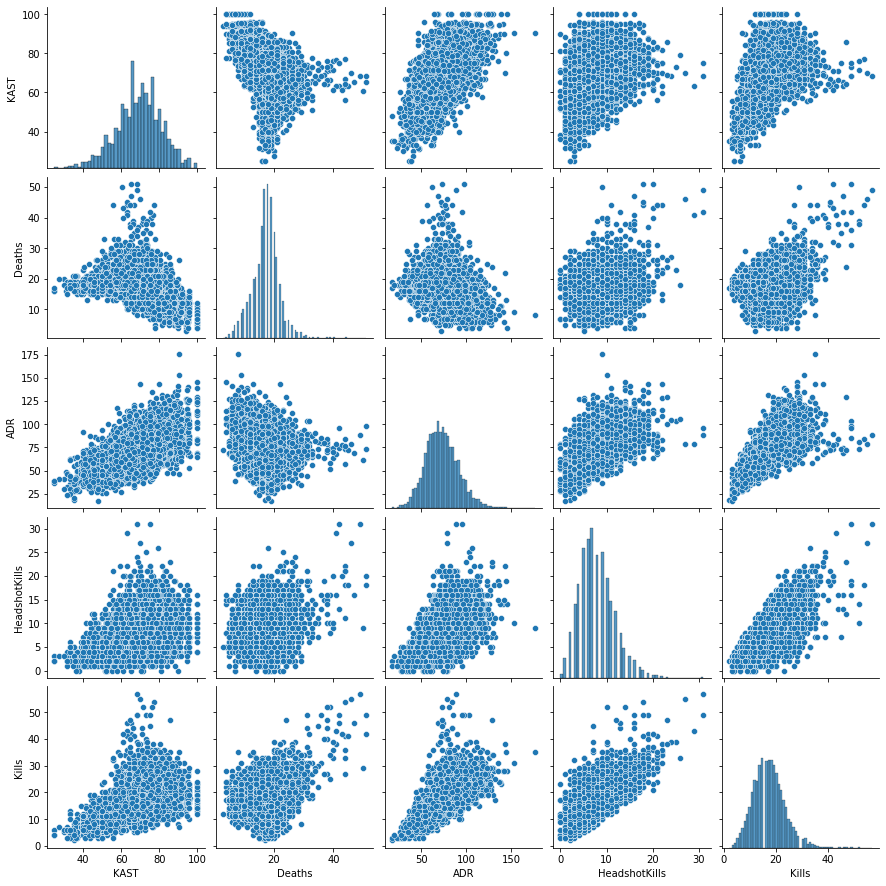

In [ ]:
sns.pairplot(df[strong_corr], kind='scatter', diag_kind='hist')
plt.show()

<div dir=rtl>

## ד. הגדרת הבעיה

לאחר ניתוח מעמיק של הנתונים והגעה למערך נתונים אופטימלי, השאלה שאותה נרצה לחקור היא השאלה הראשונית ששאלנו: האם שחקן CS:GO מסוים ניצח במשחק? ננסה לחזות זאת בעזרת נתונים על ביצועיו של השחקן במשחק זה.

ראינו שיש לנו יכולת בינונית לחזות האם שחקן ינצח בהתבסס רק על משתנה אחד, אך השערתי היא שמודל שאבנה עם כל התכונות יוכל לחזות בצורה טובה מאוד האם השחקן ניצח או לא, כי באופן טבעי לשחקנים המנצחים יהיו נתונים יותר טובים (למשל יותר הריגות) מלשחקנים המפסידים.

<div dir=rtl>

## ה. הכנה למודל למידת מכונה

<div dir=rtl>

### הגדרת משתנה מאפיינים ומשתנה מטרה

עבור משתנה המאפיינים X, נשתמש בכל מערך הנתונים **מלבד** משתנה המטרה Winner, והמשתנים Nickname ו-Team (שבהם החלטנו לא להשתמש).

עבור משתנה המטרה y נבחר רק את עמודת היעד Winner.

In [ ]:
X = df.drop(['Nickname', 'Team', 'Winner'], axis=1)
y = df['Winner']

<div dir=rtl>

### פיצול לסט אימון וסט בדיקה

נשתמש בפונקציה `train_test_split` מתוך Scikit-Learn כדי לפצל את המשתנים X ו-y לשני סטים כל אחד: אימון, שעליו נאמן את המודל וגודלו יהיה 80% מגודל המערך המקורי, ובדיקה, שאיתו נבדוק את המודל, וגודלו 20% מהמערך המקורי. יש צורך לבדוק את המודל על סט שהוא לא התאמן עליו, כדי למנוע מצב של התאמת יתר (overfitting).

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.copy(), y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape, X_test.shape

((3968, 7), (992, 7))

<div dir=rtl>

אנו יכולים לראות שהפיצול היה באמת ביחס של 20% ו-80% מהסט המקורי.

<div dir=rtl>

## ו. ארגון והנדסת תכונות

<div dir=rtl>

### הנדסת מאפיינים / Feature Engineering

בחלק זה נבצע פעולות שונות על המשתנים שלנו שישפרו את המודל שלנו ויאפשרו לנו להשתמש בתכונות נוספות בו.


<div dir=rtl>

#### טיפול בערכים חריגים במשתנים המספריים

ראינו קודם שיש ערכים חריגים במשתנים שלנו, נבדוק באילו מהמשתנים יש ערכים חריגים.

In [ ]:
((X_train[numerical] > upper_fence) | (X_train[numerical] < lower_fence)).sum()

Kills             50
HeadshotKills     67
Assists          106
Deaths           171
KAST              60
ADR               40
dtype: int64

In [ ]:
((X_test[numerical] > upper_fence) | (X_test[numerical] < lower_fence)).sum()

Kills            17
HeadshotKills    16
Assists          24
Deaths           42
KAST             16
ADR              15
dtype: int64

<div dir=rtl>

בכל המשתנים יש ערכים חריגים.

נטפל בערכים חריגים: לכל משתנה בו יש ערכים חריגים, נחליף את כל הערכים שיוצאים מהטווח שקבענו במינימום או במקסימום של הטווח, בהתאמה.

In [ ]:
for df1 in [X_train, X_test]:
    for col in numerical:
        df1.loc[df1[col] < lower_fence[col], col] = lower_fence[col]
        df1.loc[df1[col] > upper_fence[col], col] = upper_fence[col]

In [ ]:
((X_train > upper_fence) | (X_train < lower_fence)).sum().sum() + ((X_test > upper_fence) | (X_test < lower_fence)).sum().sum()

0

<div dir=rtl>

כעת אנו רואים שלא נשארו כלל חריגים, בשני הסטים.

<div dir=rtl>

#### המרת משתנה היעד מבוליאני למספרי

עבור סט האימון וסט הבדיקה, נמיר את המשתנה מ-`True` ו-`False` ל-1 ו-0 בהתאמה.

In [ ]:
y_train, y_test = [y1.astype(int) for y1 in [y_train, y_test]]

In [ ]:
y_train[:10]

4449    1
1204    1
80      0
803     1
1769    1
2107    0
3425    1
2503    1
3623    0
4466    0
Name: Winner, dtype: int32

In [ ]:
y_test[:10]

3135    1
2191    0
1295    1
2902    1
168     1
1128    1
4530    0
4281    0
4176    1
1020    0
Name: Winner, dtype: int32

<div dir=rtl>

#### הנדסת מאפיינים קטגוריאליים

עבור סט האימון וסט הבדיקה, נשתמש בקידוד חם של `pd.get_dummies` עבור העמודה Country, כך שנקבל k עמודות נוספות.

In [ ]:
X_train, X_test = [pd.get_dummies(df1, columns=['Country'], prefix='Country') for df1 in [X_train, X_test]]

In [ ]:
X_train.head()

,Kills,HeadshotKills,Assists,Deaths,KAST,ADR,Country_Argentina,Country_Australia,Country_Bosnia and Herzegovina,Country_Brazil,...,Country_Slovakia,Country_South Africa,Country_Spain,Country_Sweden,Country_Taiwan,Country_Turkey,Country_Ukraine,Country_United Kingdom,Country_United States,Country_Uzbekistan
4449,14.0,4.0,4.0,18.0,64.7,42.3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1204,14.0,5.0,6.0,11.0,86.4,68.4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80,16.0,5.0,4.0,18.0,65.4,77.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
803,24.0,11.0,7.0,27.0,68.6,74.3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1769,16.0,8.0,4.0,18.0,73.3,52.4,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
X_test.head()

,Kills,HeadshotKills,Assists,Deaths,KAST,ADR,Country_Argentina,Country_Australia,Country_Bosnia and Herzegovina,Country_Brazil,...,Country_Slovakia,Country_South Africa,Country_Spain,Country_Sweden,Country_Taiwan,Country_Turkey,Country_Ukraine,Country_United Kingdom,Country_United States,Country_Uzbekistan
3135,26.0,11.0,5.0,11.0,88.5,106.6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2191,20.0,6.0,3.0,18.0,69.2,74.2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1295,33.0,15.0,1.0,20.0,72.4,90.2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2902,15.0,7.0,5.0,15.0,81.0,80.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
168,14.0,10.0,2.0,13.0,72.0,58.4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<div dir=rtl>

### נרמול הנתונים / Feature Scaling

כעת נביא את כל התכונות לקנה מידה אחיד של בין 0 ל-1.

נציג את הערכים המינימליים והמקסימיליים של המשתנים המספריים בסט האימון:

In [ ]:
for col in numerical:
    print(f"{col:15} min: {round(X_train[col].min(), 2):<6} max: {round(X_train[col].max(), 2).max()}")

Kills           min: 2.0    max: 33.0
HeadshotKills   min: 0.0    max: 17.5
Assists         min: 0.0    max: 10.5
Deaths          min: 7.5    max: 27.5
KAST            min: 39.4   max: 99.4
ADR             min: 24.86  max: 120.16


<div dir=rtl>

כעת נשתמש במחלקה `MinMaxScaler` של Scikit-Learn כדי לבצע את הנרמול. על סט האימון נבצע `fit_transform`, כלומר אימון והחלת קנה המידה, ועל סט הבדיקה נבצע רק `transform`, כלומר רק נחיל עליו את קנה המידה מסט האימון. הדבר נחוץ למניעת התאמת יתר.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X_train.columns)

<div dir=rtl>

כעת נציג שוב את אותם ערכים בסט האימון:

In [ ]:
for col in numerical:
    print(f"{col:15} min: {X_train[col].min():<6} max: {X_train[col].max()}")

Kills           min: 0.0    max: 1.0
HeadshotKills   min: 0.0    max: 1.0
Assists         min: 0.0    max: 1.0
Deaths          min: 0.0    max: 1.0
KAST            min: 0.0    max: 1.0
ADR             min: 0.0    max: 1.0


<div dir=rtl>

אפשר לראות שכעת בכל התכונות הערכים נעים בין 0 ל-1.

<div dir=rtl>

## ז. מודל למידת מכונה - רגרסיה לוגיסטית

<div dir=rtl>

### אימון המודל

נאמן את מודל למידת המכונה על מערכי האימון.

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', random_state=42)

logreg.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

<div dir=rtl>

### חיזוי הסתברויות

נשתמש בפעולה `predict_proba` כדי לחזות את הסיכוי שהשחקן ינצח או יפסיד. קיבלנו מערך שבו בכל שורה 2 עמודות, העמודה השמאלית היא ההסתברות שהשחקן יפסיד, והעמודה הימנית היא ההסתברות שהשחקן ינצח. סכום שתי ההתסברויות האלה הוא תמיד 1 בכל שורה.

In [ ]:
logreg.predict_proba(X_test)[:10]

array([[0.01537305, 0.98462695],
       [0.62687225, 0.37312775],
       [0.40795208, 0.59204792],
       [0.20702255, 0.79297745],
       [0.25049054, 0.74950946],
       [0.24717437, 0.75282563],
       [0.20275046, 0.79724954],
       [0.78790181, 0.21209819],
       [0.14291732, 0.85708268],
       [0.81427289, 0.18572711]])

<div dir=rtl>

## ח. בחינת ביצועי המודל

<div dir=rtl>

### נכונות הניבוי / Accuracy Score

הנכונות מחושבת על פי היחס בין מספר החיזויים הנכונים למספר כל החיזויים. נשווה את הנכונות של סט האימון ושל סט הבדיקה כדי לבדוק עבור התאמת יתר (overfitting).

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_test = logreg.predict(X_test)

y_pred_train = logreg.predict(X_train)

print('Test set accuracy score:', accuracy_score(y_test, y_pred_test))
print('Training set accuracy score:', accuracy_score(y_train, y_pred_train))

Test set accuracy score: 0.7913306451612904
Training set accuracy score: 0.8046875


<div dir=rtl>

ההבדל בין נכונות סט האימון לסט הבדיקה זניח (פחות מאחוז), ולכן אפשר להסיק שבמודל אין התאמת יתר.

<div dir=rtl>

כעת נבדוק בעבור תת-התאמה. מכיוון שהנכונות בין שני הסטים קרובה, יכול להיות שישנה תת-התאמה. כדי לבדוק זאת צריך להתאים את ערך ה-C, שמשמעותו כמה "עונש" (penalty) יש למודל שלנו. ה-C נמצא ביחס הפוך עם ערך הלמדא מפונקציית המחיר (cost function) של הרגרסיה. ככל שנעלה את ערך ה-C, הנכונות עבור סט האימון תגדל, אך עלול להיווצר מצב של התאמת יתר. ככל שנקטין את ערך ה-C, נכונות שני הסטים תקטן, אך הדבר יכול לפתור בעיה של התאמת יתר, במידה ויש כזו. ברירת המחדל היא C=1.

נשווה את נכונות שני הסטים עבור C של 0.01 ו-100.

In [ ]:
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)

logreg100.fit(X_train, y_train)

print('Test set score:', logreg100.score(X_test, y_test))
print('Training set score:', logreg100.score(X_train, y_train))

Test set score: 0.7903225806451613
Training set score: 0.8067036290322581


In [ ]:
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)

logreg001.fit(X_train, y_train)

print('Test set score:', logreg001.score(X_test, y_test))
print('Training set score:', logreg001.score(X_train, y_train))

Test set score: 0.7741935483870968
Training set score: 0.7875504032258065


<div dir=rtl>

אנו רואים כי הגדלת ערך ה-C מובילה לגדילה מאוד קטנה בנכונות, ולא גורמת להתאמת יתר, והקטנת ערך ה-C משמעותית פוגעת בנכונות, וגורמת למצב של תת-התאמה. השיפור שאנו רואים מאוד קטן, ולכן נסתפק בערך ברירת המחדל.

<div dir=rtl>

### השוואת הנכונות אל מול התוצאה השכיחה ביותר (Null Accuracy)

נכונות המודל שלנו גבוהה, אך כדי להיות בטוחים שהיא טובה, צריך להשוותה למצב שבו תמיד מנבאים את הערך השכיח. נמצא את הערך השכיח בעמודת הבדיקה (כי עליה חישבנו את הנכונות).

In [ ]:
y_test.value_counts()

1    500
0    492
Name: Winner, dtype: int64

<div dir=rtl>

הערך השכיח הוא 1, אז נמצא את החלק היחסי שלו בין כל הערכים.

In [ ]:
y_test.value_counts()[1]/len(y_test)

0.5040322580645161

<div dir=rtl>

יכולת הניבוי במקרה הזה גרועה מאוד, ולכן המודל שלנו עושה עבודה טובה בניבוי.

<div dir=rtl>

### מטריצת טעות / Confusion Matrix

מטריצת טעות (Confusion Matrix) היא כלי המאפשר סיכום של ביצועי מודל המיון. מטריצת טעות נותנת לנו תמונה ברורה של ביצועי המודל וסוגי השגיאות שנוצרו. נוכל לראות סיכום של חיזויים נכונים ולא נכונים לכל קטגוריה, באמצעות טבלה.

ישנם ארבעה סוגי תוצאות שיכולות לקרות בעת שקלול ביצועי המודל, והן:

* **חיובי אמיתי / True Positives (TP)** – המשמעות של תוצאה זו היא שחזינו שערך מסוים שייך לקבוצה והוא אכן שייך אליה בפועל.

* **שלילי אמיתי / True Negatives (TN)** – המשמעות של תוצאה זו היא שחזינו שערך לא שייך לקבוצה והוא אכן לא שייך אליה.

* **חיובי כוזב / False Positives (FP)** – המשמעות של תוצאה זו היא שחזינו שערך שייך לקבוצה אבל בפועל הוא לא שייך אליה. שגיאה זו נקראת **שגיאה מסוג 1** (Type I error).

* **שלילי כוזב / False Negatives (FN)** – המשמעות של תוצאה זו היא שחזינו שערך לא שייך לקבוצה אבל בפועל הוא שייך אליה. שגיאה זו היא מאוד רצינית ונקראת **שגיאה מסוג 2** (Type II error).

ארבע התוצאות הללו מסוכמות במטריצת הטעות הנתונה למטה.

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) =', cm[0,0])

print('\nTrue Negatives (TN) =', cm[1,1])

print('\nFalse Positives (FP) =', cm[0,1])

print('\nFalse Negatives (FN) =', cm[1,0])

Confusion matrix

 [[400  92]
 [115 385]]

True Positives (TP) = 400

True Negatives (TN) = 385

False Positives (FP) = 92

False Negatives (FN) = 115


<div dir=rtl>

אנו רואים במטריצת הטעות כי ישנם `400+385=785` חיזויים נכונים ו-`92+115=207` חיזויים שגויים.

נציג את מטריצת הטעות בצורה גרפית בעזרת מפת חום של seaborn.

<AxesSubplot:>

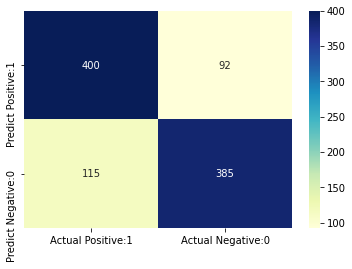

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

<div dir=rtl>

### דו"ח קלסיפיקציה / Classification Report <a class="anchor" name="16.1"></a>

דוח קלסיפיקציה הוא דרך נוספת להעריך את ביצועי מודל הסיווג. הוא מציג את ערכי הדיוק (precision), כיסוי (recall), מדד f1, ותמיכה (support) עבור המודל. משמעות הערכים תוסבר בהמשך.

אפשר להדפיס את דוח הקלסיפיקציה בצורה הבאה:

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       492
           1       0.81      0.77      0.79       500

    accuracy                           0.79       992
   macro avg       0.79      0.79      0.79       992
weighted avg       0.79      0.79      0.79       992



<div dir=rtl>

נדפיס ערכים שונים שחלקם אינם חלק מדוח הסיווג:

In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
print('Classification accuracy:', (TP + TN) / (TP + TN + FP + FN))
print('Classification error:', (FP + FN) / (TP + TN + FP + FN))
print('Precision:', TP / (TP + FP))
print('Recall or Sensitivity:', TP / (TP + FN))
print('False Positive Rate:', FP / (FP + TN))
print('Specificity:', TN / (TN + FP))

Classification accuracy: 0.7913306451612904
Classification error: 0.2086693548387097
Precision: 0.8130081300813008
Recall or Sensitivity: 0.7766990291262136
False Positive Rate: 0.1928721174004193
Specificity: 0.8071278825995807


<div dir=rtl>

#### הסבר על הערכים השונים

* **נכונות (Accuracy)**: הנכונות היא אחוז החיזויים הנכונים מתוך כלל החיזויים - `(TP + TN) / (TP + TN + FP + FN)`.
* **שגיאת הסיווג (Classification Error)**: שגיאת הסיווג היא אחוז הערכים שנחזו באופן כוזב מתוך כלל החיזויים - `(FP + FN) / (TP + TN + FP + FN)`.
* **דיוק (Precision)**: הדיוק הוא אחוז הערכים שנחזו חיוביים נכונה מתוך אחוז כלל הערכים שנחזו חיוביים - `TP / (TP + FP)`.
* **כיסוי (Recall)**: הכיסוי (נקרא גם רגישות - Sensitivity או שיעור החיוביים האמיתיים - True Positive Rate) הוא אחוז הערכים שנחזו חיוביים נכונה מתוך כל הערכים החיוביים - `TP / (TP + FN)`.
* **שיעור החיוביים הכוזבים (False Positive Rate)**: שיעור החיוביים הכוזבים הוא אחוז הערכים השליליים שנחזו באופן כוזב מתוך כלל הערכים השליליים - `FP / (FP + TN)`.
* **סגוליות (Specificity)**: הסגוליות היא אחוז הערכים השליליים שנחזו נכונה מתוך כלל הערכים השליליים - `FP / (FP + TN)`.
* **מדד f1 &#8207; (f1-score)**: מדד f1 הוא הממוצע המשוקלל ההרמוני של הדיוק והכיסוי. הערך הטוב ביותר של המדד הוא 1.0 והערך הגרוע ביותר הוא 0.0. הממוצע המשוקלל של המדד נועד כדי להשוות מודלי סיווג, ולא בתור דיוק כללי.
* **תמיכה (Support)**: התמיכה היא מספר המופעים של המחלקה בנתונים עצמם.

<div dir=rtl>

### (threshold level) התאמת ערך הסף

ערך הסף הוא ערך בין 0 ל-1, שאם ההתסברות שנחזתה גבוהה ממנו, יבוצע חיזוי חיובי. ברירת המחדל היא 0.5, אך ניתן לשנות אותה על מנת להגיע לערכי מדדים שונים, בהתאם לצורכי החיזוי.

תחילה נשמור את ההסתברויות ששחקן ינצח למשתנה ונציג דיאגרמה של ההסתברויות.

In [ ]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
y_pred_prob[:10]

array([0.98462695, 0.37312775, 0.59204792, 0.79297745, 0.74950946,
       0.75282563, 0.79724954, 0.21209819, 0.85708268, 0.18572711])

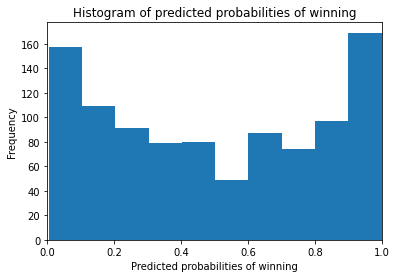

In [ ]:
plt.hist(y_pred_prob, bins = 10)

plt.title('Histogram of predicted probabilities of winning')

plt.xlim(0,1)

plt.xlabel('Predicted probabilities of winning')
plt.ylabel('Frequency')

plt.show()

<div dir=rtl>

אפשר לראות שהדיאגרמה נראית כמו התפלגות נורמלית הפוכה, ויש יותר חיזויים הנוטים לכיוון 0 או 1 מאשר חיזויים שנמצאים באמצע.

<div dir=rtl>

#### תוצאות המודל עבור ערכי סף שונים

נבדוק את ביצועי המודל שלנו עבור ערכי סף בין 0.1 ל-0.9.

In [ ]:
from sklearn.preprocessing import binarize

for i in range(1,10):
        
    y_pred_prob1 = binarize(y_pred_prob.reshape(-1,1), threshold=i/10)
    
    cm1 = confusion_matrix(y_test, y_pred_prob1)
        
    print ('With',i/10,'threshold the Confusion Matrix is ', '\n\n', cm1, '\n\n',
           
            'with', cm1[0,0]+cm1[1,1], 'correct predictions,', '\n\n', 
           
            cm1[0,1], 'Type I errors (False Positives),', '\n\n',
           
            cm1[1,0], 'Type II errors (False Negatives),', '\n\n',
           
           'Accuracy score:', (accuracy_score(y_test, y_pred_prob1)), '\n\n',
           
           'Sensitivity:', cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',
           
           'Specificity:', cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',
          
            '====================================================', '\n\n')

With 0.1 threshold the Confusion Matrix is  

 [[147 345]
 [  7 493]] 

 with 640 correct predictions, 

 345 Type I errors (False Positives), 

 7 Type II errors (False Negatives), 

 Accuracy score: 0.6451612903225806 

 Sensitivity: 0.986 

 Specificity: 0.29878048780487804 



With 0.2 threshold the Confusion Matrix is  

 [[242 250]
 [ 23 477]] 

 with 719 correct predictions, 

 250 Type I errors (False Positives), 

 23 Type II errors (False Negatives), 

 Accuracy score: 0.7247983870967742 

 Sensitivity: 0.954 

 Specificity: 0.491869918699187 



With 0.3 threshold the Confusion Matrix is  

 [[303 189]
 [ 52 448]] 

 with 751 correct predictions, 

 189 Type I errors (False Positives), 

 52 Type II errors (False Negatives), 

 Accuracy score: 0.7570564516129032 

 Sensitivity: 0.896 

 Specificity: 0.6158536585365854 



With 0.4 threshold the Confusion Matrix is  

 [[348 144]
 [ 87 413]] 

 with 761 correct predictions, 

 144 Type I errors (False Positives), 

 87 Type I

<div dir=rtl>

ניתן לראות כי מדד הרגישות גבוה יותר ומדד הסגוליות נמוך יותר כאשר ערך הסף נמוך יותר, ולהפך. כלומר, בהתאם לצורך של החיזוי, אפשר להתאים את ערך הסף על מנת להקטין את אחד מסוגי הטעויות, על חשבון השני. אנו רואים כי הנכונות מקסימלית בערך באמצע, ובמקרי הקצה היא נמוכה יותר.


### ROC - AUC

<div dir=rtl>

#### עקומת ROC


כלי נוסף למדידת ביצועי מודל הסיווג הוא עקומת ROC. משמעות המילה היא **עקומה אופיינית למסווג**. העקומה מציגה את ביצועי המודל ברמות סף שונות.

העקומה מציגה את שיעור החיוביים האמיתיים לעומת החיוביים הכוזבים ברמות סף שונות.

רמת החיוביים האמיתיים נקראת גם כיסוי (TPR / Recall). חישובה מתבצע על ידי `TP/(TP+FN)`.

רמת החיוביים הכוזבים (FPR) מחושבת על ידי `FP/(FP+TN)`.

בעקומת ה-ROC, מתמקדים בשיעור החיוביים האמיתיים והחיוביים הכוזבים בנקודה בודדת. כך אפשר למדוד את ביצועי המודל עבור רמות סף שונות, שכן אם נוריד את רמת הסף, יותר ערכים יסווגו כחיוביים, ולכן רמות החיוביים הכוזבים והאמיתיים יעלו.

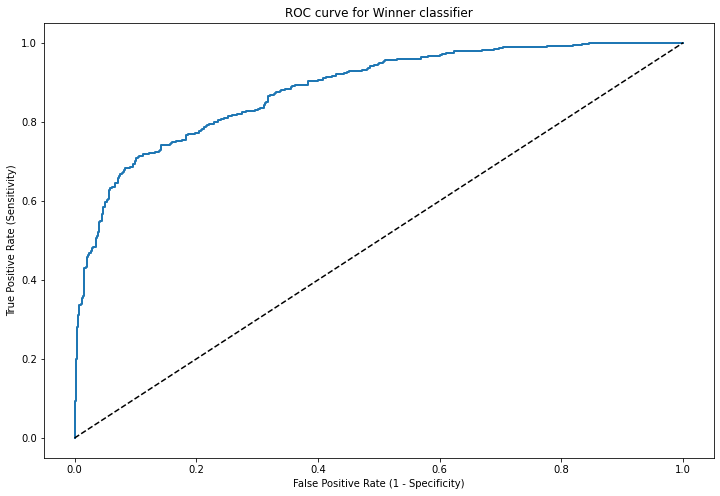

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(12,8))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.title('ROC curve for Winner classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

<div dir=rtl>

עקומת ROC עוזרת לנו לבחור רמת סף שמאזנת את הרגישות והסגוליות לרמות מתאימות עבור הקשר מסוים.

<div dir=rtl>

#### ROC AUC


ROC AUC אומר Receiver Operating Characteristic - Area Under Curve, כלומר השטח שמתחת לעקומה האופיינית למסווג. השטח מאפשר להשוות את ביצועי המודל. עבור מודל מושלם נקבל שהשטח מתחת לעקומה הוא 1, ועבור מודל אקראי לחלוטין נקבל שהשטח מתחת לעקומה הוא 0.5.


השטח מתחת לעקומה (ROC AUC), הוא האחוז מהגרף שנמצא מתחת לעקומה עצמה.


In [ ]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_prob)

print('ROC AUC:', ROC_AUC)

ROC AUC: 0.8816178861788617


In [ ]:
from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC:', Cross_validated_ROC_AUC)

Cross validated ROC AUC: 0.8863563166058007


<div dir=rtl>

- ROC AUC הוא סיכום של ביצועי המודל בערך בודד. ככל שהוא גבוה יותר, המודל שלנו טוב יותר.

- הערך של המודל שלנו קרוב ל-1, אז נוכל להסיק שמודל הסיווג עושה עבודה די טובה בחיזוי.

- גם באימות צולב ערך ה-AUC גבוה.

<div dir=rtl>

## ט. טיוב המודל

<div dir=rtl>

### סילוק מאפיינים מחזורי באמצעות אימות צולב / Recursive Feature Elimination with Cross Validation


סילוק מאפיינים מחזורי (RFE) היא טכניקה לבחירת מאפיינים (features) המאפשרת בחירת המאפיינים האופטימליים למודל. המודל נבנה בתחילה עם כל המאפיינים, ואז נפטרים כל פעם מהמאפיין הכי פחות שימושי (שתורם הכי מעט לחיזוי) ובונים את המודל שוב, עד שכל המאפיינים הלא חשובים סולקו.

סילוק מאפיינים מחזורי עם אימות צולב (RFECV) היא טכניקה המבצעת סילוק מאפיינים מחזורי, תוך ביצוע אימות צולב בכל פעם. האימות הצולב ב-k חתיכות עובר על סט האימון k פעמים, כאשר בכל פעם בוחרים חלק המהווה ‎1/k מהסט כולו, אשר עליו לא מתאמנים והוא משמש בעצם בתור סט בדיקה למדד הנכונות. בכל חזרה בוחרים חלק אחר, מתאמנים על כל שאר הסט, ומחשבים בעזרת חלק זה את הנכונות, ולבסוף מחשבים את הממוצע של כל ערכי הנכונות יחד.

נשתמש באימות צולב ב-5 חתיכות כאן.

נשתמש בטכניקה זו כדי לבחור את המאפיינים הטובים ביותר למודל.


In [ ]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=logreg, step=1, cv=5, scoring='accuracy')

rfecv = rfecv.fit(X_train, y_train)

print("Optimal number of features:", rfecv.n_features_)
print("List of optimal featues:", list(X_train.columns[rfecv.get_support()]))

Optimal number of features: 21
List of optimal featues: ['Kills', 'HeadshotKills', 'Assists', 'Deaths', 'KAST', 'ADR', 'Country_Argentina', 'Country_Brazil', 'Country_China', 'Country_Estonia', 'Country_Indonesia', 'Country_Latvia', 'Country_Mexico', 'Country_Netherlands', 'Country_Poland', 'Country_Russia', 'Country_Spain', 'Country_Taiwan', 'Country_United Kingdom', 'Country_United States', 'Country_Uzbekistan']


In [ ]:
X_train_rfecv = rfecv.transform(X_train)

logreg.fit(X_train_rfecv, y_train)

X_test_rfecv = rfecv.transform(X_test)

y_pred_rfecv = logreg.predict(X_test_rfecv)

print ("Classifier score:",rfecv.score(X_test, y_test))

Classifier score: 0.7913306451612904


<div dir=rtl>

אפשר לראות שהצלחנו להגיע לתוצאת נכונות דומה בעזרת 21 תכונות, שהן כל התכונות המספריות, ורק חלק מהעמודות של `Country`. לכן אנו יכולים להסיק שמשתנה המדינה משפיע בצורה נמוכה יותר על המודל שלנו.

<div dir=rtl>

#### בדיקה מחדש של מטריצת הטעות

נדפיס שוב את מטריצת הטעות עבור המודל החדש כדי לראות אילו טעויות נוצרו בו.

In [ ]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, y_pred_rfecv)

print('Confusion matrix\n\n', cm1)

print('\nTrue Positives(TP1) =', cm1[0,0])

print('\nTrue Negatives(TN1) =', cm1[1,1])

print('\nFalse Positives(FP1) =', cm1[0,1])

print('\nFalse Negatives(FN1) =', cm1[1,0])

Confusion matrix

 [[400  92]
 [115 385]]

True Positives(TP1) = 400

True Negatives(TN1) = 385

False Positives(FP1) = 92

False Negatives(FN1) = 115


<div dir=rtl>

בשני המודלים היו לנו בדיוק 92 ו-115 חיוביים כוזבים ושליליים כוזבים בהתאמה. כלומר קיבלנו עם פחות תכונות, מודל זהה, ביעילות יותר גבוהה.

<div dir=rtl>

### אופטימזציית היפר-פרמטרים בעזרת GridSearch CV

GridSearch CV  היא טכניקה שמאפשרת אופטימיזציה של היפר-פרמטרים, שהם הפרמטרים שקובעים את מידת הרגולריזציה במודל למידת המכונה. הטכניקה עובדת בשיטה של בדיקה כוחנית (brute force), כלומר היא בודקת כל אחת ואחת מהקומבינציות האפשריות ומשווה את התוצאה ביניהן, כדי למצוא את הטובה ביותר. במקרה שלנו אנו מעבירים שני סטים של פרמטרים - הראשון הוא `penalty` שיכול להיות `l1` - שמשמעותו שמשתמשים בערך מוחלט ברגולריזציה, או `l2` - שמשמעותו שמשתמשים בהעלאה בריבוע. הפרמטר השני הוא C - שעליו הוסבר מקודם, והוא בעצם 1 חלקי למדא בתוספת לפונקציית המחיר. התוצאה נבדקת בשיטה של אימות צולב, במקרה שלנו ב-5 חתיכות.

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'penalty':['l1','l2'], 'C':[1, 10, 100, 1000]}

grid_search = GridSearchCV(estimator = logreg, param_grid = parameters, scoring = 'accuracy', cv = 5)

grid_search.fit(X_train, y_train)

print('GridSearch CV best score:', grid_search.best_score_)

print('\nParameters that give the best results:', grid_search.best_params_)

print('\nEstimator that was chosen by the search:', grid_search.best_estimator_)

GridSearch CV best score: 0.8041779296806757

Parameters that give the best results: {'C': 1, 'penalty': 'l1'}

Estimator that was chosen by the search: LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear')


In [ ]:
print('GridSearch CV score on test set:', grid_search.score(X_test, y_test))

GridSearch CV score on test set: 0.7903225806451613


<div dir=rtl>

מצאנו שהשימוש ב-l1 ורגולריזציה רגילה מביאה לתוצאות כמעט זהות לחלוטין, לכן השימוש ב-GridSearch CV לא שיפר את ביצועי המודל שלנו.

<div dir=rtl>

## י. סיכום תוצאות


<div dir=rtl>

### מסקנות מהפרויקט

1. נכונות מודל הסיווג היא 0.79, כלומר הוא עושה עבודה טובה בחיזוי האם השחקן ניצח או לא.
2. עבור ערך סף של 0.5, כמות התחזיות לכל מצב דומה.
3. נראה כי המודל לא במצב של התאמת יתר (overfitting).
4. שינוי ערך הסף יכול לשנות את כמות הטעויות מכל סוג - הגדלת ערך הסף מובילה ליותר טעויות מסוג 2 ופחות טעויות מסוג 1, ולהפך.
5. עם אימות צולב, הנכונות הממוצעת היא 0.8, ולכן אין חשש להתאמת יתר במודל.
6. ה-ROC AUC של המודל הוא 0.88, ולכן אפשר להסיק שהוא חוזה בצורה די טובה.
7. בעזרת RFECV מגיעים לנכונות כמעט זהה, כלומר אפשר להשיג תוצאות דומות עם פחות מאפיינים. גם כמות הטעויות נשארת דומה.
8. נכונות המודל של GridSearch CV כמעט זהה לנכונות המודל המקורי, ולכן אנו יכולים להסיק ש-GridSearch CV לא משפר את ביצועי המודל.

אפשר להשתמש במודל המאומן על מנת לחזות במשחקים עתידיים, לאיזה שחקנים הסיכוי הכי גדול לנצח - מה שמאפשר למשל הימורים על ניצחון קבוצה אחת, בהתבסס על נתונים ממוצעים של שחקנים בקבוצה או משחקים קודמים שלה. בנוסף אפשר לראות אילו שחקנים באמת תורמים לניצחון הקבוצה ואילו מהם אפשר להחליף בשחקנים חזקים יותר - זאת משום שלשחקנים החזקים לרוב יהיה חיזוי חיובי של ניצחון, אבל לחלשים, אפילו באותו משחק, יהיה חיזוי שלילי לעיתים.

<div dir=rtl>

### תהליך העבודה שלי ורפלקציה

בהכנת הפרויקט נעזרתי בפרויקט המגן של חיזוי גשם באוסטרליה, וממנו שאבתי טכניקות להערכת ושיפור המודל. נעזרתי גם בקורס של המכון הטכנולוגי חולון ממנו למדתי כיצד לאסוף את המידע בעזרת web scraping.

חשבתי רבות על הנושא שעליו אעשה את הפרויקט. חיפשתי באתר kaggle בסיסי נתונים שעליהם אוכל לעבוד, אך לא מצאתי שום דבר שבאמת מעניין אותי. לכן החלטתי לגשת לחיפוש הנתונים בצורה שונה: קודם חשבתי על נושא, ואז בדקתי איך אוכל לאסוף נתונים הקשורים אליו, בין אם דרך kagggle, דרך API או scraping. &#8207;CS:GO הוא משחק אהוב עליי שהשקעתי בו שעות רבות, ואני לעיתים צופה במשחקים מקצועיים תחרותיים, ולכן ניסיתי למצוא נתונים הקשורים למשחק. ב-kaggle היו רק כמה מסדי נתונים בודדים, ולא היו בהם מספיק נתונים בשביל שאוכל לעשות משהו משמעותי איתם. לכן פניתי לחיפוש API מתאים, אך גם כאן מצאתי בודדים ובהם לא מספיק נתונים. אז נזכרתי באתר hltv, שבו יש המון נתונים שונים שבטוח אוכל להשתמש בהם ושיעזרו לי רבות.

איסוף הנתונים היה גם החלק הכי קשה בפרויקט בשבילי, כי הייתי צריך ללמוד לחפש באתר האינטרנט את המידע שהייתי צריך. זה לקח הרבה ניסוי וטעייה להגיע לקוד שעובד, ובעיה עיקרית הייתה שאתר האינטרנט חסם אותי לאחר שביצעתי יותר מדי בקשות. באופן מפתיע העבודה על החלק הזה הייתה גם הכי מספקת ומעניינת. העבודה על המודל עצמו הייתה די דומה לתהליך שבפרויקט המגן, מלבד תיקונים ותוספות שונות שביצעתי. הרבה תוצאות אצלי היו שונות מאלה של פרויקט המגן, ולכן הייתי צריך לפעול בהתאם. ביצעתי שינויים שונים בתהליך כמו השמטת חלקים שונים מהקוד, אך לבסוף השארתי את התוצאה הטובה ביותר שקיבלתי מבין כל ניסיונותי.

במיוחד אהבתי כאמור את איסוף הנתונים, בנוסף אהבתי את תהליך שיפור המודל והגעה לתוצאה מקסימלית. פחות אהבתי את תהליך ה-EDA, כי הוא פחות פרקטי ודורש בחינה מעמיקה של נתונים וגרפים, מה שלרוב פחות מעניין מעבודה ממשית על הנתונים, כמו עיבוד שלהם או בחינת ביצועים.

<div dir=rtl>

## יא. רשימת מקורות

1. [פרויקט המגן - גשם באוסטרליה](https://colab.research.google.com/drive/1sZUadZzPCpqGKyN2h2ETtq9WfIcyqZ5a?usp=sharing) \([המקור באנגלית](<https://www.kaggle.com/prashant111/extensive-analysis-eda-fe-modelling>))
2. [קורס מבוא למדעי הנתונים של המכון הטכנולוגי חולון](https://campus.gov.il/course/hit-acd-rfp4-hit-data-hit-2019-1/)
3. [קורס למידת מכונה של אוניברסיטת סטאנפורד](https://www.coursera.org/learn/machine-learning)
4. [hltv.org](https://www.hltv.org/), האתר שממנו אספתי את הנתונים לפרויקט
5. שאלה מתוך Stack Overflow אשר נעזרתי בה באיסוף הנתונים: [Python Requests throws SSL Error on certain site](https://stackoverflow.com/questions/44294218/python-requests-throws-ssl-error-on-certain-site)

<div dir=rtl>

**תודה על הקריאה!**
